## Sensing matrix generation

Sensing matrix is designed to guide the mixing of drugs into each sample. The sensing matrix design is a combinatorial optimization problem, of which the objective is to ensure reliable and robust deconvolution. Here, we take 9*15 matrix as an example

### Import package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from core.core import *

### Set parameters

In [2]:
n_pools = 9        # Set the number of pools as 9
n_drugs = 15       # Set the number of drugs as 15
n_replicates = 3   # Each drug exists in 3 pools

### Run the optimization

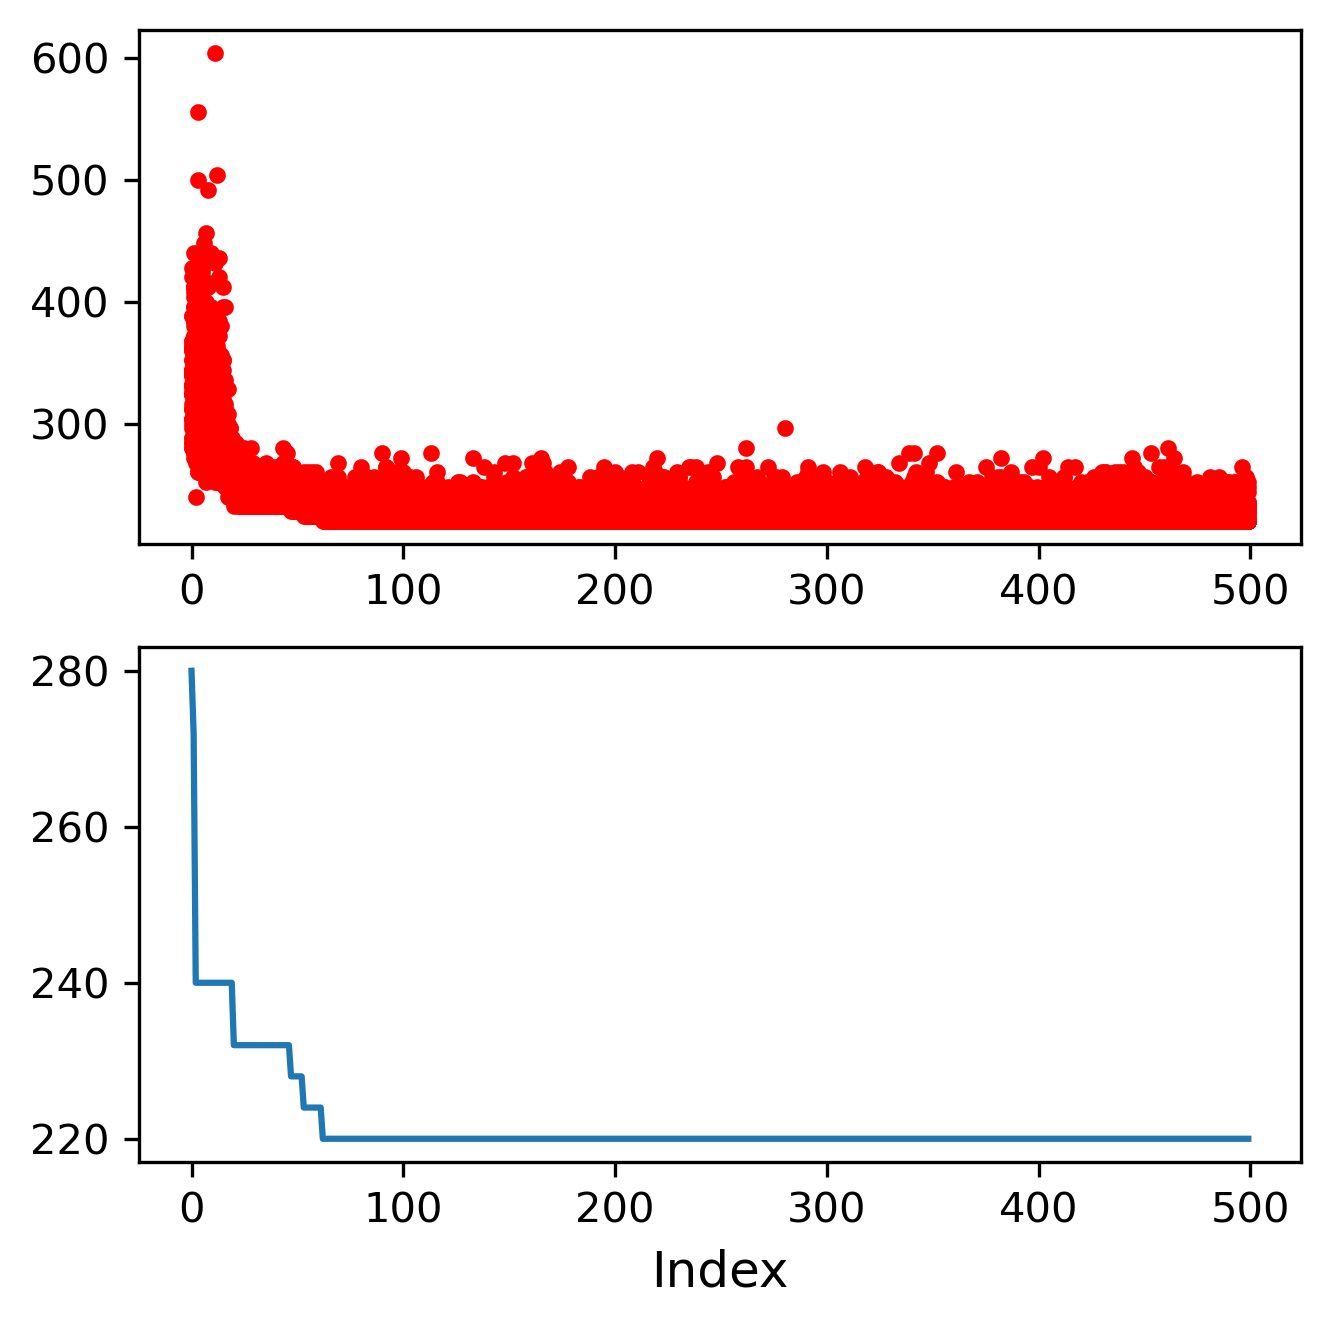

In [3]:
pool_matrix = generate_sensing_matrix(n_pools = n_pools, n_drugs = n_drugs, n_replicates = n_replicates)

In [4]:
# Set the name of drugs and make them as colnames of the matrix
drug_names = ['Palbociclib', 'Panobinostat', 'Raltitrexed', 'Methotrexate',
               'Vemurafenib', 'Fimepinostat', 'Olaparib', 'Bafetinib', 'SCIO-469',
               'OTS964', 'SL-327', 'Abemaciclib', 'CCT137690', 'Belumosudil',
               'Staurosporine']
pool_matrix = pd.DataFrame(pool_matrix, columns = drug_names)

### Visualize the matrix

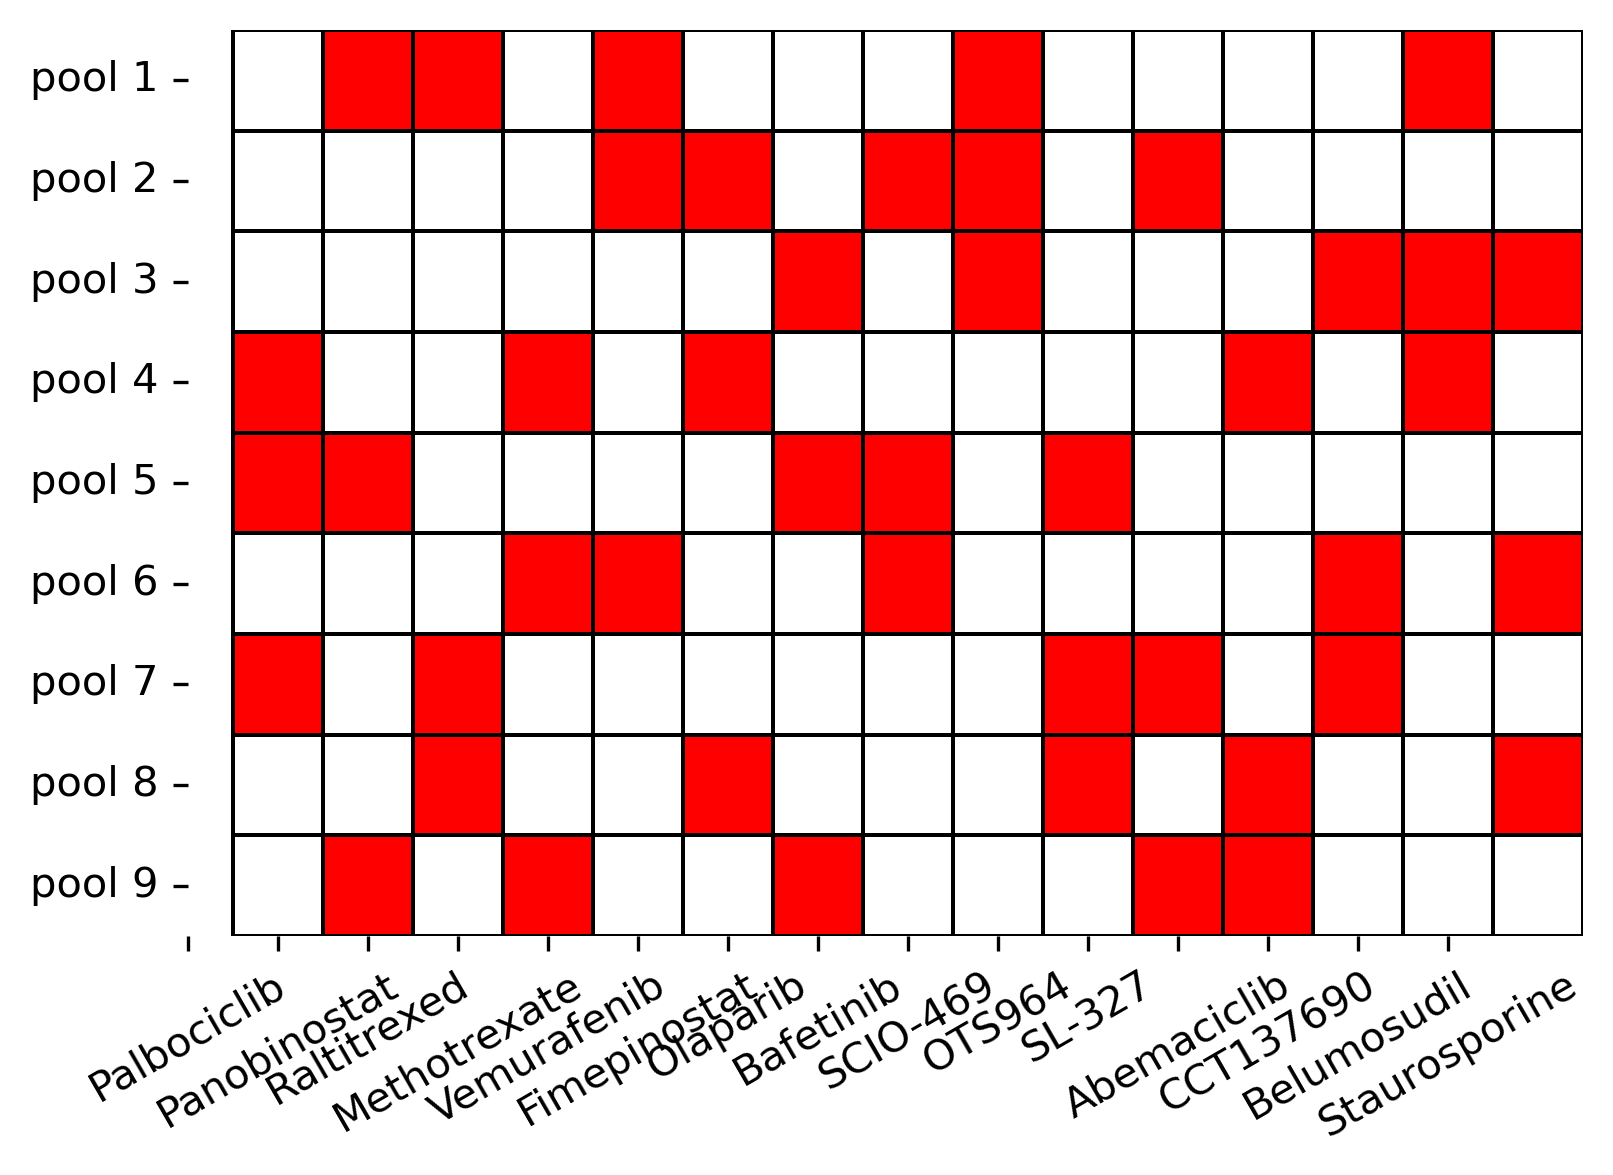

In [5]:
from seaborn import heatmap

# Since the GA algorithm has randomness, here we load the preliminary saved matrix
pool_matrix = pd.read_excel('data/sensing_matrix_15drugs.xlsx')

# Fill NA with zero
pool_matrix = pool_matrix.fillna(0)

plt.figure(dpi = 300)
heatmap(pool_matrix, cbar = False, cmap = ['#FFFFFF', '#FF0000'], linewidths = 0.5, linecolor = 'black')
plt.xticks(np.arange(n_drugs) - 0.5, drug_names, rotation=30)
plt.yticks(np.arange(n_pools) + 0.5, ['pool {}'.format(i + 1) for i in range(9)], rotation = 0)
plt.show()

### Barplot of efficiency

In [ ]:
method = ['TPP-TR', 'TPP-CCR', 'iTSA/PISA', 'MAPS-iTSA (9*15)']
drugTMT = np.array([1/4, 1/2, 1, 15])


plt.figure(dpi = 300, figsize = (8, 8))
sns.barplot(x=method, y=np.log2(drugTMT + 0.02), palette='pastel', edgecolor=".2")
plt.xticks(fontsize = 18, rotation=20)
plt.yticks(fontsize = 18)
plt.xlabel('')
plt.ylabel('No. of drugs per TMT Expt.(Log2)', fontsize = 20)
plt.ylim(-4, 7)